# Segmenting and Clustering Neighborhoods in Toronto

In this assignment, you will be required to explore, segment, and cluster the neighborhoods in the city of Toronto. Data is not readily available on the internet. What is interesting about the field of data science is that each project can be challenging in its unique way, so you need to learn to be agile and refine the skill to learn new libraries and tools quickly depending on the project.

For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. You will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format like the New York dataset.

Once the data is in a structured format, you can replicate the analysis that we did to the New York City dataset to explore and cluster the neighborhoods in the city of Toronto.


In [1]:
#!conda install -c conda-forge geopy --yes

In [2]:
#!conda install -c conda-forge folium=0.5.0 --yes

In [3]:
#conda update -n base -c defaults conda

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


import folium # map rendering library
from bs4 import BeautifulSoup
import lxml
from IPython.display import display_html
print('Libraries imported.')

Libraries imported.


## Scraping the Wikipedia page

In [5]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
soup = BeautifulSoup(source.text, 'lxml')
print(soup.title)
table=str(soup.table)
display_html(table, raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal code,Borough,Neighborhood
M1A,Not assigned,
M2A,Not assigned,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Regent Park / Harbourfront
M6A,North York,Lawrence Manor / Lawrence Heights
M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
M8A,Not assigned,
M9A,Etobicoke,Islington Avenue
M1B,Scarborough,Malvern / Rouge


In [6]:
df=pd.read_html(table, header=0)[0]
df.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [7]:
df.shape

(180, 3)

In [8]:
# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned
df=df[df['Borough']!='Not assigned']

df = df.groupby(['Postal code','Borough'], sort=False).agg(', '.join)
df.reset_index(inplace=True)

#If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
df['Neighborhood'] = np.where(df['Neighborhood'] == 'Not assigned',df['Borough'], df['Neighborhood'])
df.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [9]:
df.shape

(103, 3)

In [10]:
co_ord = pd.read_csv('http://cocl.us/Geospatial_data')
co_ord.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
co_ord.rename(columns={'Postal Code':'Postal code'},inplace=True)
df = pd.merge(df, co_ord, on='Postal code')
df.head()


,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494


In [12]:
df_toronto=df[df['Borough'].str.contains("Toronto")]
df_toronto

,Postal code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,Richmond / Adelaide / King,43.650571,-79.384568
31,M6H,West Toronto,Dufferin / Dovercourt Village,43.669005,-79.442259


## Map of Toronto with Neighborhoods Superimposed

In [13]:
# create map of Toronto using latitude and longitude values
latitude = 43.651070
longitude = -79.347015
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

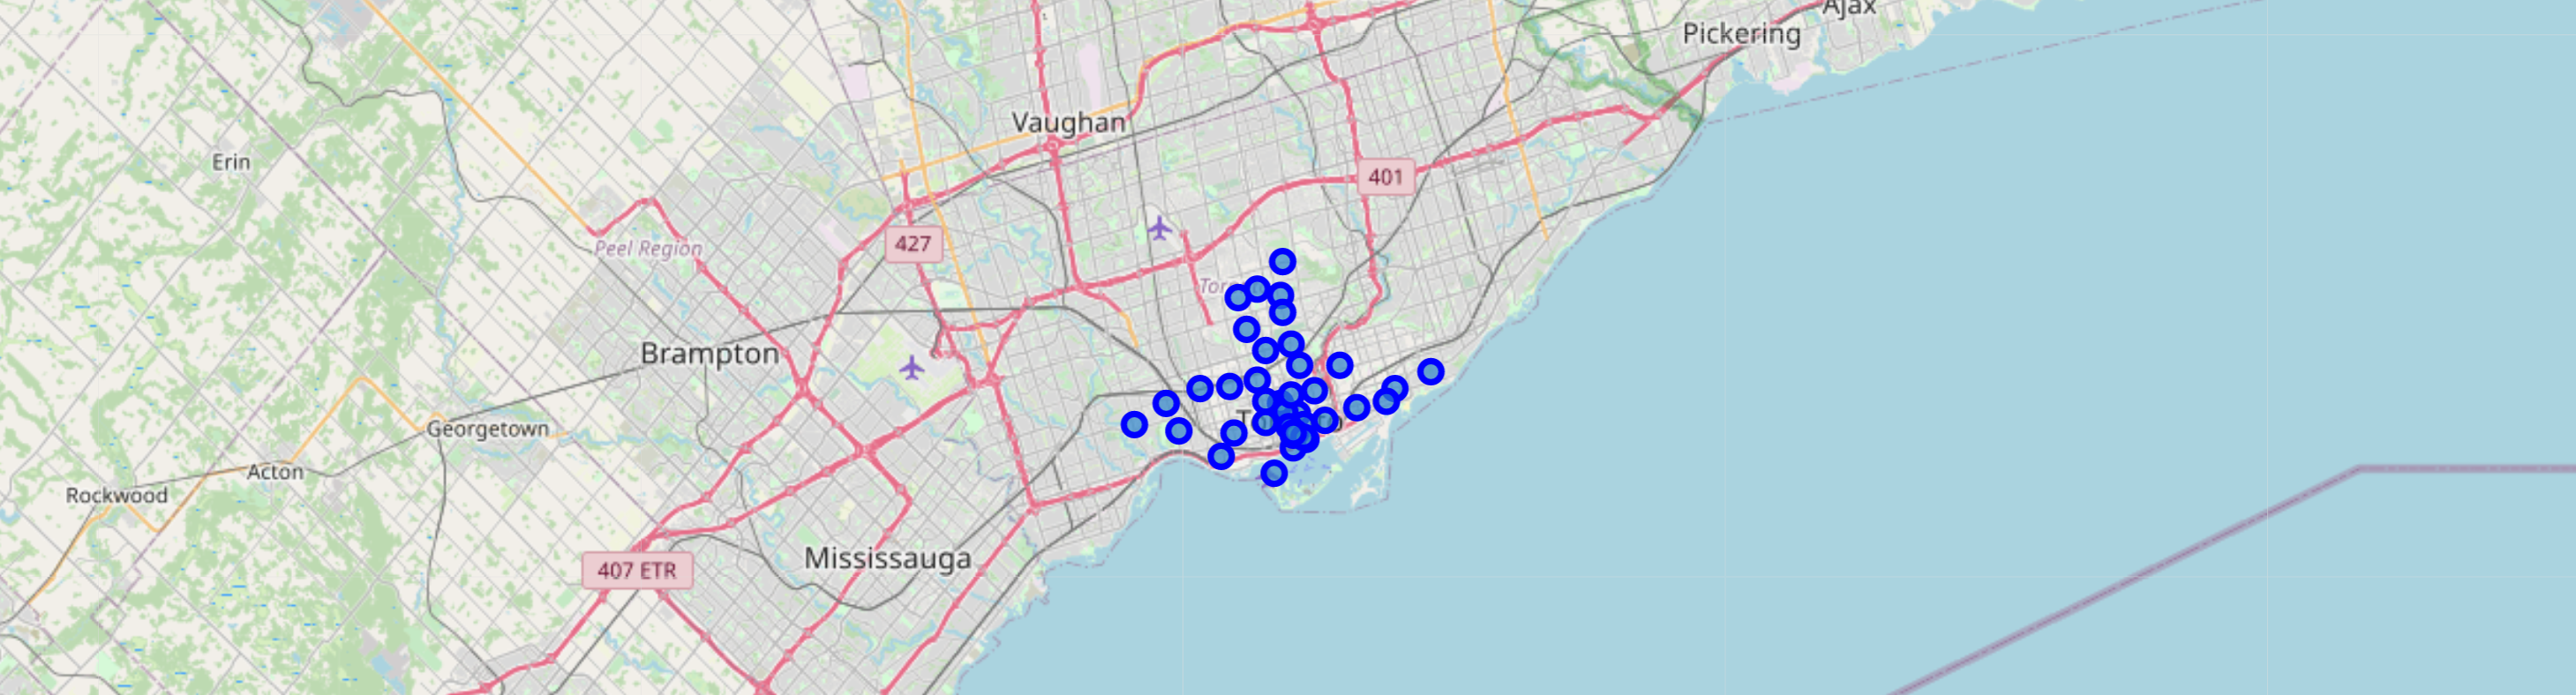

In [14]:
k = 5

df_cluster = df_toronto.drop(['Postal code','Borough','Neighborhood'],1)

kmeans = KMeans(n_clusters=k, random_state=0).fit(df_cluster)


kmeans.labels_
df_toronto.insert(0, 'Cluster Name', kmeans.labels_)
df_toronto

,Cluster Name,Postal code,Borough,Neighborhood,Latitude,Longitude
2,0,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
4,0,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494
9,0,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,0,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,4,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,3,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,0,M5H,Downtown Toronto,Richmond / Adelaide / King,43.650571,-79.384568
31,1,M6H,West Toronto,Dufferin / Dovercourt Village,43.669005,-79.442259


## Clustered Neighborhoods

In [15]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, nh, cluster in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighborhood'], df_toronto['Cluster Name']):
    label = folium.Popup(str(nh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [16]:
# Defining Foursquare Credentials and Version

CLIENT_ID = ' '# My Foursquare ID
CLIENT_SECRET = ' ' # My Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: INFLLXQ1EOBUPLJMCWOU0E4UOVOOKW1MCFDVVXKQADUHJMVN
CLIENT_SECRET:YRSWJS4LGQTTIUP1Z2NLGZNHBKVZLYRL3TA5S5VQHFIU1K4Q


In [17]:
df_toronto.reset_index(inplace=True,drop=True)


In [18]:
df_toronto.loc[0, 'Neighborhood']

neighborhood_latitude = df_toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_toronto.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park / Harbourfront are 43.6542599, -79.3606359.


## Top 100 venues near Regent Part within 500 meters radius

In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=INFLLXQ1EOBUPLJMCWOU0E4UOVOOKW1MCFDVVXKQADUHJMVN&client_secret=YRSWJS4LGQTTIUP1Z2NLGZNHBKVZLYRL3TA5S5VQHFIU1K4Q&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9feb049388d700241cf61c'},
 'response': {'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 46,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.653446723052674,
          'lng': -79.3620167174383}],
        'distance': 143,
       

In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

46 venues were returned by Foursquare.


The notebook source code was inspired from the notebook created by [Alex Aklson](https://www.linkedin.com/in/aklson/) and [Polong Lin](https://www.linkedin.com/in/polonglin/) for Coursera course Applied Data Science Capstone.